# 01 – Buffered Model Demo (Two-Regime)

Matplotlib is building the font cache; this may take a moment.


Selected objective: {'objective': 151.87517272464197}
Params (IN/OUT): {'IN': [0.151, 0.222, 0.057], 'OUT': [0.009, -0.247, 0.02]}


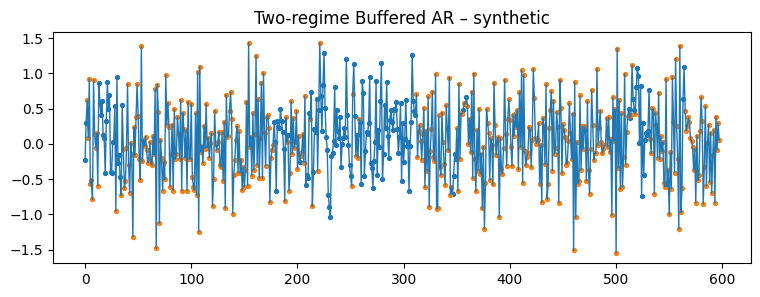

In [1]:
import sys, pathlib
sys.path.insert(0, str(pathlib.Path().resolve().parents[0]))
import numpy as np, matplotlib.pyplot as plt
from src.buffered_tar import BufferedTAR
np.random.seed(42); T=600
z=np.cumsum(np.random.normal(0,0.2,T)); y=np.zeros(T)
gamma,band=0.0,0.3; phi_in,phi_out=0.6,-0.2
for t in range(1,T):
    inside = abs(z[t-1]-gamma)<=band
    phi = phi_in if inside else phi_out
    y[t]=phi*y[t-1]+np.random.normal(0,0.5)
m=BufferedTAR.grid_search(y,z,mode='two')
print('Selected objective:', m.selected_)
print('Params (IN/OUT):', {k:(v.round(3).tolist() if v is not None else None) for k,v in m.params_.items()})
Y=y[m.p:]; IN=m.masks_['M']; import numpy as np
plt.figure(figsize=(9,3)); plt.plot(Y,lw=1); idx=np.arange(len(Y)); OUT=~IN
plt.scatter(idx[IN],Y[IN],s=8); plt.scatter(idx[OUT],Y[OUT],s=8); plt.title('Two-regime Buffered AR – synthetic'); plt.show()
import pandas as pd, pathlib
pathlib.Path('figs').mkdir(exist_ok=True)
pd.DataFrame({k:(v if v is None else v.round(6)) for k,v in m.params_.items()}).to_csv('figs/params_buffered_two_regime.csv')
